In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Generating data
x = np.linspace(0,3,100)
y = 2*x + 5*x**2

In [25]:
x.shape, y.shape

((100,), (100,))

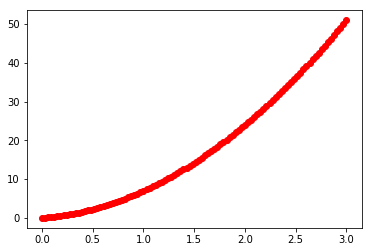

In [26]:
plt.plot(x, y, 'ro')
plt.show()

In [27]:
# introduce noise
mu, sigma = 0, 2 # mean, standard deviation
noise = np.random.normal(mu, sigma, 100)
s = noise

In [28]:
#new y is now Y
Y = y + s

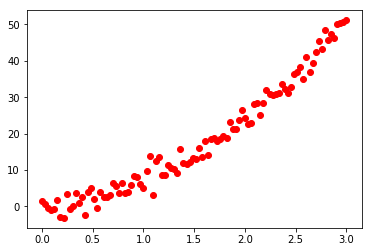

In [29]:
plt.plot(x, Y, 'ro')
plt.show()


In [30]:
x.shape[0]

100

In [31]:
def x_transform(x, deg):
    X = x.reshape(x.shape[0],1)
    t = X.copy()
    #Appending columns of higher degrees to X
    for i in range(deg-1):
        X = np.append(X, t**deg, axis=1)
    return X

In [32]:
X= x_transform(x, 2)

In [33]:
X.shape, Y.shape

((100, 2), (100,))

# Model Development

In [334]:
# Initialization of the weight W

W = np.array([[1.33509132],[5.33509132]])      
b = 0.04080542598287517

In [335]:
def x_transform1(X, deg):
    t = X.copy()
    #Appending columns of higher degrees to X
    for i in range(deg, deg+1):
        X = np.column_stack((X, t**i))
    return X

In [336]:
def x_transform1(X, deg):
    t = X.copy()
    #Appending columns of higher degrees to X
    f = X

In [337]:
X.shape, y.shape, W.shape

((100, 2), (100,), (2, 1))

In [338]:
# y_hat = w1*x1 + w2*x2
y_hat = W[0]*x + W[1]*x**2 + b

In [339]:
y_hat

array([4.08054260e-02, 8.61618125e-02, 1.41316346e-01, 2.06269028e-01,
       2.81019857e-01, 3.65568834e-01, 4.59915958e-01, 5.64061229e-01,
       6.78004648e-01, 8.01746215e-01, 9.35285929e-01, 1.07862379e+00,
       1.23175980e+00, 1.39469396e+00, 1.56742626e+00, 1.74995671e+00,
       1.94228531e+00, 2.14441206e+00, 2.35633695e+00, 2.57805999e+00,
       2.80958118e+00, 3.05090052e+00, 3.30201800e+00, 3.56293364e+00,
       3.83364741e+00, 4.11415934e+00, 4.40446942e+00, 4.70457764e+00,
       5.01448401e+00, 5.33418852e+00, 5.66369119e+00, 6.00299200e+00,
       6.35209096e+00, 6.71098807e+00, 7.07968332e+00, 7.45817672e+00,
       7.84646827e+00, 8.24455797e+00, 8.65244581e+00, 9.07013180e+00,
       9.49761594e+00, 9.93489823e+00, 1.03819787e+01, 1.08388572e+01,
       1.13055340e+01, 1.17820089e+01, 1.22682819e+01, 1.27643531e+01,
       1.32702224e+01, 1.37858898e+01, 1.43113555e+01, 1.48466192e+01,
       1.53916811e+01, 1.59465412e+01, 1.65111994e+01, 1.70856557e+01,
      

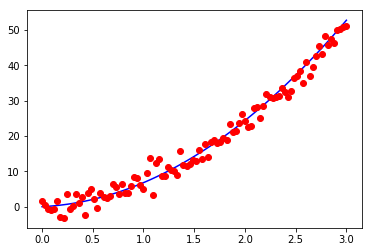

In [327]:
plt.plot(x, y_hat, "b")
plt.plot(x, Y, 'ro')
plt.show()

In [68]:
# Loss or Error computation
def err(y, y_hat):
    return (y-y_hat)**2

loss = err(Y, y_hat)

In [70]:
loss.shape

(100,)

In [71]:
# Cost computation
cost = np.mean(loss)

In [116]:
Y.shape

(100,)

In [120]:
y_hat.shape

(100,)

In [121]:
# derivative of loss
dl_dw = -2*X.T*(Y-y_hat)

In [123]:
dl_dw.shape

(2, 100)

In [124]:
# derivative of cost
dc_dw = 1/X.shape[0] + np.mean(dl_dw)

In [131]:
# update weight parameter
w_old = W
alpha = 0.01
w_new = w_old - alpha*np.sum(dl_dw)
w_new

array([[50.36744471],
       [52.36744471]])

In [291]:
# Polynomial regressor
def fit(epochs, w, x, y, a=0.01,):
    log_cost = []
    w_new = w
    history = {'cost':[], 'w':[]}
    for i in range(epochs):
        y_hat = w_new[0]*x + w_new[1]*x**2
        loss = (y-y_hat)**2
        cost = 1/x.shape[0] *np.mean(loss)
        dcost_dw = 1/x.shape[0] * sum((-2*x.T)*(y-y_hat))
        w_old = w_new
        w_new = w_old - a*(dcost_dw)
        log_cost.append(np.log(cost))
        if i%5 == 0:
            print(f'Train epoch {i}---> J(w) = {cost} @ w = {w_new}')
            history['cost'].append(cost)
            history['w'].append(w_new)
    return history

In [296]:
w = np.array([[2],[6]])
f = fit(60,w,x,Y )

Train epoch 0---> J(w) = 0.19161699046782096 @ w = [[1.86923278]
 [5.86923278]]
Train epoch 5---> J(w) = 0.0586842858822407 @ w = [[1.51378947]
 [5.51378947]]
Train epoch 10---> J(w) = 0.04314053382244173 @ w = [[1.394871]
 [5.394871]]
Train epoch 15---> J(w) = 0.041178457233755524 @ w = [[1.35508519]
 [5.35508519]]
Train epoch 20---> J(w) = 0.04088448986709367 @ w = [[1.3417743]
 [5.3417743]]
Train epoch 25---> J(w) = 0.040826711630378244 @ w = [[1.33732096]
 [5.33732096]]
Train epoch 30---> J(w) = 0.04081192253446535 @ w = [[1.33583103]
 [5.33583103]]
Train epoch 35---> J(w) = 0.04080748297178901 @ w = [[1.33533255]
 [5.33533255]]
Train epoch 40---> J(w) = 0.04080605455410233 @ w = [[1.33516578]
 [5.33516578]]
Train epoch 45---> J(w) = 0.04080558302616192 @ w = [[1.33510999]
 [5.33510999]]
Train epoch 50---> J(w) = 0.04080542598287517 @ w = [[1.33509132]
 [5.33509132]]
Train epoch 55---> J(w) = 0.04080537352167328 @ w = [[1.33508507]
 [5.33508507]]


In [343]:
W = np.array([[1.33508507],[5.33508507]])      
b = 0.04080537352167328

In [344]:
y_hat = W[0]*x + W[1]*x**2 + b

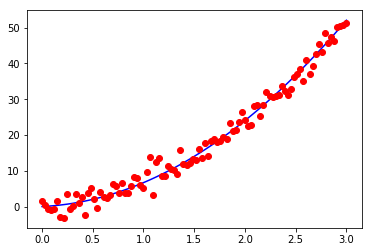

In [345]:
plt.plot(x, y_hat, "b")
plt.plot(x, Y, 'ro')
plt.show()

# This is best I can do for now sir